# Explorando dados com Pandas

Felipe Pontes

## Agenda

* O que é *pandas*?
* Estruturas de dados
* Funcionalidades
* Integrações
* Aplicações

# [github.com/felipemfp/python-day-natal-2017](https://github.com/felipemfp/python-day-natal-2017)

# O que é *pandas*?

> pandas is an **open source**, **BSD-licensed** library providing **high-performance**, **easy-to-use data structures** and **data analysis tools** for the Python programming language

## O que é *pandas*?

* Biblioteca *open-source*
* **PAN**el **D**ata **S**ystem
* +11k &#x1F31F; no GitHub

## *numpy*

* *ndarray* e matriz
* Acesso por índice
* Tipo único de dados

In [117]:
import numpy as np
arr = np.array([1, 3, 5, 7], dtype=np.int64)
arr

array([1, 3, 5, 7])

| índice | 0 | 1 | 2 | 3 |
| - | - | - | - | - | 
| **elemento**  | 1 | 3 | 5 | 7 | 

## *pandas*

* Construído em cima do *numpy*
* Acesso por rótulo (índice ou coluna)
* Tipos varíados de dados

![Exemplo de DataFrame](images/dataframe-example.png)

## Por quê?

* Aplicável para o mundo real
* Estruturas de dados intuitivas
* Baterias inclusas para preparação, análise e exploração de dados

## *pandas* no ecossistema

![](images/pandas-context-01.jpg)

## *pandas* no ecossistema

![](images/pandas-context-02.jpg)

# Estruturas de Dados

In [118]:
import pandas as pd

## Estruturas de Dados

![](images/data-structures.png)

## Series

* Lista rotulada de 1 dimensão
* Qualquer tipo de dado
  * inteiros
  * strings
  * decimais
  * objetos
  
```python
s = pd.Series(data, index=index)
```

## Criando Series

### A partir de um `np.ndarray`

In [119]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s

a   -0.363051
b    0.657138
c   -1.482879
d    0.019643
e   -0.009886
dtype: float64

In [120]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [121]:
pd.Series(np.random.randn(5))

0    0.158455
1    0.758866
2   -0.933195
3    0.785129
4    0.420429
dtype: float64

## Criando Series

### A partir de um `dict`

In [122]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}
pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [123]:
pd.Series(d, index=['b', 'c', 'd', 'a'])

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

> `NaN`  significa "Not a Number" e é um marcador padrão para valores que estão faltando.

## Criando Series

### A partir de um `valor`

In [124]:
pd.Series(5., index=['a', 'b', 'c', 'd', 'e'])

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

## Series são como `np.ndarray`

In [125]:
s[0]

-0.3630508545612619

In [126]:
s[:3]

a   -0.363051
b    0.657138
c   -1.482879
dtype: float64

In [127]:
s[[4, 3, 1]]

e   -0.009886
d    0.019643
b    0.657138
dtype: float64

## Series são como `dict`

In [128]:
s['a']

-0.3630508545612619

In [129]:
s['e'] = 12.

In [130]:
s

a    -0.363051
b     0.657138
c    -1.482879
d     0.019643
e    12.000000
dtype: float64

In [131]:
'e' in s

True

In [132]:
'f' in s

False

## Operações com Series

In [133]:
s + s

a    -0.726102
b     1.314275
c    -2.965758
d     0.039287
e    24.000000
dtype: float64

In [134]:
s * 3

a    -1.089153
b     1.971413
c    -4.448637
d     0.058930
e    36.000000
dtype: float64

In [135]:
s[1:] + s[:-1]

a         NaN
b    1.314275
c   -2.965758
d    0.039287
e         NaN
dtype: float64

## DataFrame

* Composição de `Series`
* Colunas com diferentes tipos

```python
df = pd.DataFrame(data, index=index)
```


## Criando DataFrames

### A partir de um `dict`

In [136]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [137]:
pd.DataFrame(d, index=['d', 'b', 'a'])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [138]:
pd.DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'three'])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


## Criando DataFrames

### A partir de uma lista de `dict`

In [139]:
data2 = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [140]:
pd.DataFrame(data2, index=['first', 'second'])

,a,b,c
first,1,2,NaN
second,5,10,20.0


## Criando DataFrames

### A partir de uma `Series`

* Mantém os índices
* Uma coluna com nome da Series ou argumento passado

## Operações com DataFrame

### Projeção

In [141]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

### Adição

In [142]:
df['three'] = df['one'] * df['two']
df['flag'] = df['one'] > 2
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


In [143]:
df['foo'] = 'bar'
df

,one,two,three,flag,foo
a,1.0,1.0,1.0,False,bar
b,2.0,2.0,4.0,False,bar
c,3.0,3.0,9.0,True,bar
d,NaN,4.0,NaN,False,bar


## Operações com DataFrame

### Exclusão

In [144]:
del df['two']

In [145]:
three = df.pop('three')
df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


## Panel

* Composição de `DataFrames`
* Descontinuado

# Funcionalidades

## Criando objetos

In [146]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

## Criando objetos

In [147]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [148]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.942514,0.457859,1.796804,-0.167335
2013-01-02,1.350054,0.372804,1.179525,-1.497362
2013-01-03,1.396315,1.669783,0.014493,0.069263
2013-01-04,-1.512057,-0.942973,-0.142368,-0.042194
2013-01-05,-0.302740,-1.613105,2.650310,1.237520
2013-01-06,1.338176,-0.302371,0.908058,2.669694


## Criando objetos

In [149]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


## Entendendo os dados

In [150]:
df.head()

,A,B,C,D
2013-01-01,0.942514,0.457859,1.796804,-0.167335
2013-01-02,1.350054,0.372804,1.179525,-1.497362
2013-01-03,1.396315,1.669783,0.014493,0.069263
2013-01-04,-1.512057,-0.942973,-0.142368,-0.042194
2013-01-05,-0.302740,-1.613105,2.650310,1.237520


In [151]:
df.tail(3)

,A,B,C,D
2013-01-04,-1.512057,-0.942973,-0.142368,-0.042194
2013-01-05,-0.302740,-1.613105,2.650310,1.237520
2013-01-06,1.338176,-0.302371,0.908058,2.669694


## Entendendo os dados

In [152]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [153]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [154]:
df.values

array([[ 0.94251405,  0.45785949,  1.79680407, -0.1673346 ],
       [ 1.350054  ,  0.37280432,  1.17952484, -1.49736159],
       [ 1.39631522,  1.66978288,  0.01449329,  0.0692628 ],
       [-1.51205691, -0.94297288, -0.14236803, -0.0421941 ],
       [-0.30273957, -1.61310536,  2.65031003,  1.2375204 ],
       [ 1.33817644, -0.3023708 ,  0.90805789,  2.66969448]])

## Entendendo os dados

In [155]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.535377,-0.059667,1.067804,0.378265
std,1.192442,1.157425,1.062803,1.419640
min,-1.512057,-1.613105,-0.142368,-1.497362
25%,0.008574,-0.782822,0.237884,-0.136049
50%,1.140345,0.035217,1.043791,0.013534
75%,1.347085,0.436596,1.642484,0.945456
max,1.396315,1.669783,2.650310,2.669694


## Entendendo os dados

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 4 columns):
A    6 non-null float64
B    6 non-null float64
C    6 non-null float64
D    6 non-null float64
dtypes: float64(4)
memory usage: 240.0 bytes


## Manipulando os dados

### Obtendo a transposta

In [157]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.942514,1.350054,1.396315,-1.512057,-0.302740,1.338176
B,0.457859,0.372804,1.669783,-0.942973,-1.613105,-0.302371
C,1.796804,1.179525,0.014493,-0.142368,2.650310,0.908058
D,-0.167335,-1.497362,0.069263,-0.042194,1.237520,2.669694


## Manipulando os dados

### Ordenando índices

In [158]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.167335,1.796804,0.457859,0.942514
2013-01-02,-1.497362,1.179525,0.372804,1.350054
2013-01-03,0.069263,0.014493,1.669783,1.396315
2013-01-04,-0.042194,-0.142368,-0.942973,-1.512057
2013-01-05,1.237520,2.650310,-1.613105,-0.302740
2013-01-06,2.669694,0.908058,-0.302371,1.338176


## Manipulando os dados

### Ordenando valores

In [159]:
df.sort_values(by='B')

,A,B,C,D
2013-01-05,-0.302740,-1.613105,2.650310,1.237520
2013-01-04,-1.512057,-0.942973,-0.142368,-0.042194
2013-01-06,1.338176,-0.302371,0.908058,2.669694
2013-01-02,1.350054,0.372804,1.179525,-1.497362
2013-01-01,0.942514,0.457859,1.796804,-0.167335
2013-01-03,1.396315,1.669783,0.014493,0.069263


## Projetando os dados

In [160]:
df['A']

2013-01-01    0.942514
2013-01-02    1.350054
2013-01-03    1.396315
2013-01-04   -1.512057
2013-01-05   -0.302740
2013-01-06    1.338176
Freq: D, Name: A, dtype: float64

## Projetando os dados

In [161]:
df[0:3]

,A,B,C,D
2013-01-01,0.942514,0.457859,1.796804,-0.167335
2013-01-02,1.350054,0.372804,1.179525,-1.497362
2013-01-03,1.396315,1.669783,0.014493,0.069263


In [162]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,1.350054,0.372804,1.179525,-1.497362
2013-01-03,1.396315,1.669783,0.014493,0.069263
2013-01-04,-1.512057,-0.942973,-0.142368,-0.042194


## Projetando os dados

### Por rótulo

In [163]:
df.loc[dates[0]]

A    0.942514
B    0.457859
C    1.796804
D   -0.167335
Name: 2013-01-01 00:00:00, dtype: float64

## Projetando os dados

### Por rótulo

In [164]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.942514,0.457859
2013-01-02,1.350054,0.372804
2013-01-03,1.396315,1.669783
2013-01-04,-1.512057,-0.942973
2013-01-05,-0.302740,-1.613105
2013-01-06,1.338176,-0.302371


## Projetando os dados

### Por rótulo

In [165]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,1.350054,0.372804
2013-01-03,1.396315,1.669783
2013-01-04,-1.512057,-0.942973


## Projetando os dados

### Por rótulo

In [166]:
df.loc['20130102',['A','B']]

A    1.350054
B    0.372804
Name: 2013-01-02 00:00:00, dtype: float64

In [167]:
df.loc[dates[0],'A']

0.94251404675651695

## Projetando os dados

### Por posição

In [168]:
df.iloc[3]

A   -1.512057
B   -0.942973
C   -0.142368
D   -0.042194
Name: 2013-01-04 00:00:00, dtype: float64

In [169]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-1.512057,-0.942973
2013-01-05,-0.302740,-1.613105


## Projetando os dados

### Por posição

In [170]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,1.350054,1.179525
2013-01-03,1.396315,0.014493
2013-01-05,-0.302740,2.650310


In [171]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,1.350054,0.372804,1.179525,-1.497362
2013-01-03,1.396315,1.669783,0.014493,0.069263


## Projetando os dados

### Por posição

In [172]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.457859,1.796804
2013-01-02,0.372804,1.179525
2013-01-03,1.669783,0.014493
2013-01-04,-0.942973,-0.142368
2013-01-05,-1.613105,2.650310
2013-01-06,-0.302371,0.908058


In [173]:
df.iloc[1,1]

0.37280432445655604

## Projetando os dados

### Por condição

In [174]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.942514,0.457859,1.796804,-0.167335
2013-01-02,1.350054,0.372804,1.179525,-1.497362
2013-01-03,1.396315,1.669783,0.014493,0.069263
2013-01-06,1.338176,-0.302371,0.908058,2.669694


In [175]:
df[df > 0]

,A,B,C,D
2013-01-01,0.942514,0.457859,1.796804,NaN
2013-01-02,1.350054,0.372804,1.179525,NaN
2013-01-03,1.396315,1.669783,0.014493,0.069263
2013-01-04,NaN,NaN,NaN,NaN
2013-01-05,NaN,NaN,2.650310,1.237520
2013-01-06,1.338176,NaN,0.908058,2.669694


## Projetando os dados

### `isin()`

In [176]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,0.942514,0.457859,1.796804,-0.167335,one
2013-01-02,1.350054,0.372804,1.179525,-1.497362,one
2013-01-03,1.396315,1.669783,0.014493,0.069263,two
2013-01-04,-1.512057,-0.942973,-0.142368,-0.042194,three
2013-01-05,-0.302740,-1.613105,2.650310,1.237520,four
2013-01-06,1.338176,-0.302371,0.908058,2.669694,three


In [177]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,1.396315,1.669783,0.014493,0.069263,two
2013-01-05,-0.302740,-1.613105,2.650310,1.237520,four


## Modificando os dados

### Adicionando colunas

In [178]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [179]:
df['F'] = s1

## Modificando os dados

### Alterando valores

In [180]:
df

,A,B,C,D,F
2013-01-01,0.942514,0.457859,1.796804,-0.167335,NaN
2013-01-02,1.350054,0.372804,1.179525,-1.497362,1.0
2013-01-03,1.396315,1.669783,0.014493,0.069263,2.0
2013-01-04,-1.512057,-0.942973,-0.142368,-0.042194,3.0
2013-01-05,-0.302740,-1.613105,2.650310,1.237520,4.0
2013-01-06,1.338176,-0.302371,0.908058,2.669694,5.0


## Modificando os dados

### Alterando valores

In [181]:
df.at[dates[0],'A'] = 0
df.iat[0,1] = 0
df.loc[:,'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.796804,5,NaN
2013-01-02,1.350054,0.372804,1.179525,5,1.0
2013-01-03,1.396315,1.669783,0.014493,5,2.0
2013-01-04,-1.512057,-0.942973,-0.142368,5,3.0
2013-01-05,-0.302740,-1.613105,2.650310,5,4.0
2013-01-06,1.338176,-0.302371,0.908058,5,5.0


## Modificando os dados

### Alterando valores com condições

In [182]:
df2 = df.copy()
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.796804,5,NaN
2013-01-02,1.350054,0.372804,1.179525,5,1.0
2013-01-03,1.396315,1.669783,0.014493,5,2.0
2013-01-04,-1.512057,-0.942973,-0.142368,5,3.0
2013-01-05,-0.302740,-1.613105,2.650310,5,4.0
2013-01-06,1.338176,-0.302371,0.908058,5,5.0


## Modificando os dados

### Alterando valores com condições

In [183]:
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.796804,-5,NaN
2013-01-02,-1.350054,-0.372804,-1.179525,-5,-1.0
2013-01-03,-1.396315,-1.669783,-0.014493,-5,-2.0
2013-01-04,-1.512057,-0.942973,-0.142368,-5,-3.0
2013-01-05,-0.302740,-1.613105,-2.650310,-5,-4.0
2013-01-06,-1.338176,-0.302371,-0.908058,-5,-5.0


## Tratando os dados

In [184]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.796804,5,NaN,1.0
2013-01-02,1.350054,0.372804,1.179525,5,1.0,1.0
2013-01-03,1.396315,1.669783,0.014493,5,2.0,NaN
2013-01-04,-1.512057,-0.942973,-0.142368,5,3.0,NaN


## Tratando os dados

In [185]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.796804,5,NaN,1.0
2013-01-02,1.350054,0.372804,1.179525,5,1.0,1.0
2013-01-03,1.396315,1.669783,0.014493,5,2.0,NaN
2013-01-04,-1.512057,-0.942973,-0.142368,5,3.0,NaN


In [186]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Tratando os dados

In [187]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,1.350054,0.372804,1.179525,5,1.0,1.0


In [188]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.796804,5,5.0,1.0
2013-01-02,1.350054,0.372804,1.179525,5,1.0,1.0
2013-01-03,1.396315,1.669783,0.014493,5,2.0,5.0
2013-01-04,-1.512057,-0.942973,-0.142368,5,3.0,5.0


In [189]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.796804,5,NaN
2013-01-02,1.350054,0.372804,2.976329,10,1.0
2013-01-03,2.746369,2.042587,2.990822,15,3.0
2013-01-04,1.234312,1.099614,2.848454,20,6.0
2013-01-05,0.931573,-0.513491,5.498764,25,10.0
2013-01-06,2.269749,-0.815862,6.406822,30,15.0


In [190]:
df.apply(lambda x: x.max() - x.min())

A    2.908372
B    3.282888
C    2.792678
D    0.000000
F    4.000000
dtype: float64

## Tratando os dados

### `apply()`

In [191]:
df.apply(lambda x: [max(1, y) for y in x])

,A,B,C,D,F
2013-01-01,1.000000,1.000000,1.796804,5,1.0
2013-01-02,1.350054,1.000000,1.179525,5,1.0
2013-01-03,1.396315,1.669783,1.000000,5,2.0
2013-01-04,1.000000,1.000000,1.000000,5,3.0
2013-01-05,1.000000,1.000000,2.650310,5,4.0
2013-01-06,1.338176,1.000000,1.000000,5,5.0


## Operando com os dados

### Estatísticas

In [192]:
df.mean()

A    0.378292
B   -0.135977
C    1.067804
D    5.000000
F    3.000000
dtype: float64

## Operando com os dados

### Estatísticas

In [193]:
df.mean(1)

2013-01-01    1.699201
2013-01-02    1.780477
2013-01-03    2.016118
2013-01-04    1.080520
2013-01-05    1.946893
2013-01-06    2.388773
Freq: D, dtype: float64

## Operando com os dados

### Estatísticas

In [194]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    4
1    4
2    5
3    5
4    4
5    1
6    1
7    5
8    5
9    5
dtype: int64

In [195]:
s.value_counts()

5    5
4    3
1    2
dtype: int64

## Operando com os dados

### Strings

In [196]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [197]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Mesclando dados

### Merge

In [198]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.616159,0.441333,0.644670,2.336805
1,-0.474553,-0.398493,1.424062,-0.877346
2,-0.253474,0.265718,-2.457648,-0.231814
3,0.079574,1.797657,-0.527753,1.333898
4,-0.098189,1.196968,0.249564,-1.927953
5,-1.621114,0.080282,-0.089616,2.160123
6,0.181398,0.837641,-0.553422,-0.998054
7,0.527065,0.750490,0.248069,-0.480715
8,1.673566,0.408616,-0.297147,0.400781
9,0.711653,1.887566,-0.340432,0.284253


## Mesclando dados

### Merge

In [199]:
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-0.616159,0.441333,0.644670,2.336805
1,-0.474553,-0.398493,1.424062,-0.877346
2,-0.253474,0.265718,-2.457648,-0.231814
3,0.079574,1.797657,-0.527753,1.333898
4,-0.098189,1.196968,0.249564,-1.927953
5,-1.621114,0.080282,-0.089616,2.160123
6,0.181398,0.837641,-0.553422,-0.998054
7,0.527065,0.750490,0.248069,-0.480715
8,1.673566,0.408616,-0.297147,0.400781
9,0.711653,1.887566,-0.340432,0.284253


## Mesclando dados

### Join

In [200]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [201]:
left

,key,lval
0,foo,1
1,foo,2


In [202]:
right

,key,rval
0,foo,4
1,foo,5


## Mesclando dados

### Join

In [203]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


## Mesclando dados

### Append

In [204]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,-0.309317,0.244977,0.881038,0.138781
1,-1.930083,-0.680669,-1.452549,-0.150607
2,2.116961,-0.544347,-0.604566,-0.793241
3,-0.740517,0.088858,-0.119330,0.475188
4,1.724797,0.682759,0.165117,0.298184
5,0.505510,-1.446364,-1.630013,0.015845
6,0.416764,0.448405,0.746967,-0.059918
7,0.950208,-0.010430,0.167761,-0.325940


## Mesclando dados

### Append

In [205]:
s = df.iloc[3]
s

A   -0.740517
B    0.088858
C   -0.119330
D    0.475188
Name: 3, dtype: float64

## Mesclando dados

### Append

In [206]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.309317,0.244977,0.881038,0.138781
1,-1.930083,-0.680669,-1.452549,-0.150607
2,2.116961,-0.544347,-0.604566,-0.793241
3,-0.740517,0.088858,-0.119330,0.475188
4,1.724797,0.682759,0.165117,0.298184
5,0.505510,-1.446364,-1.630013,0.015845
6,0.416764,0.448405,0.746967,-0.059918
7,0.950208,-0.010430,0.167761,-0.325940
8,-0.740517,0.088858,-0.119330,0.475188


## Agrupando dados

In [207]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.329304,-1.481057
1,bar,one,1.123981,-1.507624
2,foo,two,-0.277149,-0.110525
3,bar,three,1.013107,1.072455
4,foo,two,-0.263508,0.635959
5,bar,two,-0.210274,-0.015596
6,foo,one,-1.456826,1.875040
7,foo,three,-1.748910,-0.674866


## Agrupando dados

In [208]:
df.groupby('A').sum()

,C,D
A,,
bar,1.926814,-0.450765
foo,-3.417090,0.244550


## Agrupando dados

In [209]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    1.123981 -1.507624
    three  1.013107  1.072455
    two   -0.210274 -0.015596
foo one   -1.127522  0.393983
    three -1.748910 -0.674866
    two   -0.540658  0.525433

# Integrações

In [210]:
%matplotlib inline

In [211]:
import matplotlib.pyplot as plt

## Matplotlib

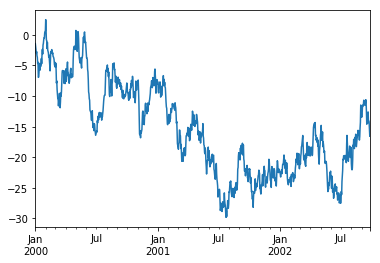

In [212]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

## Matplotlib

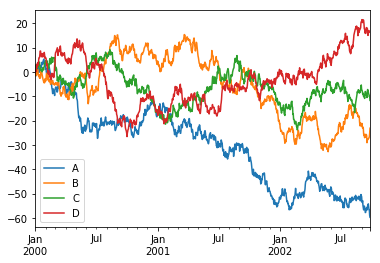

In [213]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

## CSV

In [214]:
df.to_csv('data/foo.csv', index_label='date')

In [215]:
df = pd.read_csv('data/foo.csv', index_col='date')
df.head()

,A,B,C,D
date,,,,
2000-01-01,-0.184042,0.174102,0.940474,-0.233452
2000-01-02,-0.126755,-0.524672,1.917568,0.571711
2000-01-03,-1.624824,-1.536377,2.817070,0.980146
2000-01-04,-1.535097,-1.367084,2.275337,0.119631
2000-01-05,-0.450131,-1.138307,2.793651,1.284019


## HDF5

In [216]:
df.to_hdf('data/foo.h5','df')

In [217]:
df = pd.read_hdf('data/foo.h5','df')
df.head()

,A,B,C,D
date,,,,
2000-01-01,-0.184042,0.174102,0.940474,-0.233452
2000-01-02,-0.126755,-0.524672,1.917568,0.571711
2000-01-03,-1.624824,-1.536377,2.817070,0.980146
2000-01-04,-1.535097,-1.367084,2.275337,0.119631
2000-01-05,-0.450131,-1.138307,2.793651,1.284019


## Excel

In [218]:
df.to_excel('data/foo.xlsx', index_label='date', sheet_name='Sheet1')

In [219]:
df = pd.read_excel('data/foo.xlsx', 'Sheet1', index_col='date', na_values=['NA'])
df.head()

,A,B,C,D
date,,,,
2000-01-01,-0.184042,0.174102,0.940474,-0.233452
2000-01-02,-0.126755,-0.524672,1.917568,0.571711
2000-01-03,-1.624824,-1.536377,2.817070,0.980146
2000-01-04,-1.535097,-1.367084,2.275337,0.119631
2000-01-05,-0.450131,-1.138307,2.793651,1.284019


# Obrigado! Dúvidas?

Felipe Pontes
@felipemfp
felipemfpontes@gmail.com

## Links

- [Intro to Data Structures](http://pandas.pydata.org/pandas-docs/stable/dsintro.html)
- [10 Minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)
- [PyConJP 2015: pandas internals by Sinhrks](https://speakerdeck.com/sinhrks/pyconjp-2015-pandas-internals)
- [Pandas for Data Analysis by phanhoang17](https://speakerdeck.com/huyhoang17/pandas-for-data-analysis)